In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.style as style

import warnings
warnings.filterwarnings(action='ignore')

# for scaling and imputation of null values
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ckd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archive/kidney_disease.csv')
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
ckd.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
ckd.info()
# we can see that columns pcv, wc, and rc are objects but should be numbers, fix later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# look at unique values in columns, but not ID
for i in ckd.drop("id",axis=1).columns:
    print('unique values in column "{}":\n'.format(i),ckd[i].unique())


unique values in column "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in column "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in column "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in column "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in column "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in column "rbc":
 [nan 'normal' 'abnormal']
unique values in column "pc":
 ['normal' 'abnormal' nan]
unique values in column "pcc":
 ['notpresent' 'present' nan]
unique values in column "ba":
 ['notpresent' 'present' nan]
unique values in column "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 

In [7]:
# get rid of weird values from above
# probably a better way to do this but it works
for i in range(ckd.shape[0]):
    if ckd.iloc[i,25]=='ckd\t':
        ckd.iloc[i,25]='ckd'
    if ckd.iloc[i,20] in [' yes','\tyes']:
        ckd.iloc[i,20]='yes'
    if ckd.iloc[i,20]=='\tno':
        ckd.iloc[i,20]='no'
    if ckd.iloc[i,21]=='\tno':
        ckd.iloc[i,21]='no'
    if ckd.iloc[i,16]=='\t?':
        ckd.iloc[i,16]=np.nan
    if ckd.iloc[i,16]=='\t43':
        ckd.iloc[i,16]='43'
    if ckd.iloc[i,17]=='\t?':
        ckd.iloc[i,17]=np.nan
    if ckd.iloc[i,17]=='\t6200':
        ckd.iloc[i,17]= '6200'
    if ckd.iloc[i,17]=='\t8400':
        ckd.iloc[i,17]= '8400'
    if ckd.iloc[i,18]=='\t?':
        ckd.iloc[i,18]=np.nan
    if ckd.iloc[i,25]=='ckd':
        ckd.iloc[i,25]='yes'
    if ckd.iloc[i,25]=='notckd':
        ckd.iloc[i,25]='no'

In [8]:
# drop id column, it won't get us anything from an EDA/ML perspective
ckd.drop('id',axis=1,inplace=True)

In [9]:
# update datatypes of columns that have wrong data type
cols = ['pcv','wc','rc']

# empty list for numeric columns
num = []

# add numeric columns to list
for i in ckd.columns:
    if ckd[i].dtype=='float64':
        num.append(i)

# append object fields that should be numeric to list of numeric columns
num = num+cols

# update datatype of these columns to float
for i in cols:
    ckd[i]=ckd[i].astype('float')
    
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [10]:
# looking at distribution of numeric columns
cat_cols = []

for col in ckd.columns:
    if not col in num:
        cat_cols.append(col)

# remove target variable
cat_cols.remove('classification')

cat_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [11]:
# one hot encoding for all categorical variables
# all have only two categories so this is ideal
encoded=pd.get_dummies(ckd,drop_first=True,prefix_sep=': ')
encoded.head()
# this made all the null values 0, so have to fix that
names={}
# get value from indices of original dataset where value is nan and apply to one hot encoded data
for col in ckd.columns:
    for colname in encoded.columns:
        if col+': ' in colname and col in cat_cols:
            names[col]=colname
            for i in range(400):
                if type(ckd.loc[i,col])!=str:
                    if math.isnan(ckd.loc[i,col]):
                        encoded.loc[i,colname]=ckd.loc[i,col]
names

{'rbc': 'rbc: normal',
 'pc': 'pc: normal',
 'pcc': 'pcc: present',
 'ba': 'ba: present',
 'htn': 'htn: yes',
 'dm': 'dm: yes',
 'cad': 'cad: yes',
 'appet': 'appet: poor',
 'pe': 'pe: yes',
 'ane': 'ane: yes'}

In [12]:
# making sure the last loop worked and put nan's back
test=pd.DataFrame(columns=ckd.columns)
for col in test.columns:
    if col in cat_cols:
        test[col]=encoded[names[col]]
    elif col=='classification':
        test[col]=encoded['classification: yes']
    else:
        test[col]=encoded[col]

# should all be 0, checks if cell is null in original but not in encoded
((pd.isna(ckd)==pd.isna(test))==False).sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
# evaluate different transformers/scalers for imputation of missing values


NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False)
SPT=PowerTransformer()
RS=RobustScaler()
WRS=RobustScaler(quantile_range=(15,85))
SS=StandardScaler()
MMS=MinMaxScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]

pipes=[] 
for tr in Transformers:
    p=make_pipeline(tr)
    pipes.append(p)
pipes[2]=make_pipeline(NSPT,MMS)

In [14]:
# loop over different pipelines, fit the transformers we chose to the data
arrays=[]
for pipe in pipes:
    arr=pipe.fit_transform(encoded)
    arrays.append(arr)

# loop over fitted data in each pipeline, append output to list, including original one hot encoded data
dataframes=[encoded]
for arr in arrays:
    data=pd.DataFrame(arr,columns=encoded.columns)
    dataframes.append(data)
    


In [15]:
# specify the start/end of categorical and numeric features in encoded data
categorical=encoded.columns[14:]
numeric=encoded.columns[:14]

In [16]:
# let's look at imputing values based on knn imputation, for each transformer we are testing out
imp=KNNImputer(weights='distance', n_neighbors=8)

# need to convert one hot data df to list of arrays, to pass to the imputer, for each transformer we are investigating
intarr=[encoded.to_numpy()]
for i in range(1,len(dataframes)):
    intarr.append(imp.fit_transform(dataframes[i]))

# now inverse transform the interim array for each pipeline (transformer)
arrays=[intarr[0]]
for i in range(1,len(intarr)):
    arrays.append(pipes[i-1].inverse_transform(intarr[i]))
    
#finally, we can append the values into the list of arrays
imputed=[]
for i in range(len(arrays)):
    imputed.append(pd.DataFrame(arrays[i],columns=encoded.columns))

In [17]:
# in above graph, some nan's get replaced with numbers
testdf=imputed.copy()
for j in range(1,8):
    testdata=testdf[j]
    for i in range(14,25):
        col=testdata.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [18]:
no_nulls = imputed[1].copy()
no_nulls

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc: normal,pcc: present,ba: present,htn: yes,dm: yes,cad: yes,appet: poor,pe: yes,ane: yes,classification: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,90.317304,18.0,0.8,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# go back to original values for a dataframe without nulls for us to use
# probably a better way to do this but it works
for i in range(no_nulls.shape[0]):
    if no_nulls.iloc[i,14]== 1:
        no_nulls.iloc[i,14]='normal'
    if no_nulls.iloc[i,14]== 0:
        no_nulls.iloc[i,14]='abnormal'
    if no_nulls.iloc[i,15]== 1:
        no_nulls.iloc[i,15]='normal'
    if no_nulls.iloc[i,15]== 0:
        no_nulls.iloc[i,15]='abnormal'
    if no_nulls.iloc[i,16]== 1:
        no_nulls.iloc[i,16]='present'
    if no_nulls.iloc[i,16]== 0:
        no_nulls.iloc[i,16]='notpresent'
    if no_nulls.iloc[i,17]== 1:
        no_nulls.iloc[i,17]='present'
    if no_nulls.iloc[i,17]== 0:
        no_nulls.iloc[i,17]='notpresent'
    if no_nulls.iloc[i,18]== 1:
        no_nulls.iloc[i,18]='yes'
    if no_nulls.iloc[i,18]== 0:
        no_nulls.iloc[i,18]='no'
    if no_nulls.iloc[i,19]== 1:
        no_nulls.iloc[i,19]='yes'
    if no_nulls.iloc[i,19]== 0:
        no_nulls.iloc[i,19]='no'
    if no_nulls.iloc[i,20]== 1:
        no_nulls.iloc[i,20]='yes'
    if no_nulls.iloc[i,20]== 0:
        no_nulls.iloc[i,20]='no'
    if no_nulls.iloc[i,21]== 1:
        no_nulls.iloc[i,21]='poor'
    if no_nulls.iloc[i,21]== 0:
        no_nulls.iloc[i,21]='good'
    if no_nulls.iloc[i,22]== 1:
        no_nulls.iloc[i,22]='yes'
    if no_nulls.iloc[i,22]== 0:
        no_nulls.iloc[i,22]='no'
    if no_nulls.iloc[i,23]== 1:
        no_nulls.iloc[i,23]='yes'
    if no_nulls.iloc[i,23]== 0:
        no_nulls.iloc[i,23]='no'
    if no_nulls.iloc[i,24]== 1:
        no_nulls.iloc[i,24]='ckd'
    if no_nulls.iloc[i,24]== 0:
        no_nulls.iloc[i,24]='notckd'

In [20]:
no_nulls

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc: normal,pcc: present,ba: present,htn: yes,dm: yes,cad: yes,appet: poor,pe: yes,ane: yes,classification: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,90.317304,18.0,0.8,140.0,4.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [21]:
# it looks like the gaussian quantile transformer did the best, so use that for imputation (second column)

encoded=imputed[1].copy()
encoded.dropna().shape

(400, 25)

In [22]:
#now the fun stuff

In [23]:
# k means clustering first
X=encoded.drop("classification: yes",axis=1,inplace=False)
Y=encoded["classification: yes"]

scaled=SS.fit_transform(encoded)
scaled_data=SS.fit_transform(X)

In [24]:
# ok now let's try a bunch of other models

SVM_RBF=SVC()
    
SVM_Poly2=SVC(kernel='poly',degree=2)
    
SVM_Poly3=SVC(kernel='poly',degree=3)

KNN3=KNeighborsClassifier(n_neighbors=3,weights='distance')

KNN8=KNeighborsClassifier(n_neighbors=8,weights='distance')

KNN15=KNeighborsClassifier(n_neighbors=15,weights='distance')

Naive_Bayes=GaussianNB()

LogReg=LogisticRegression()

Tree=DecisionTreeClassifier()

Forest=RandomForestClassifier()

models=[SVM_RBF,SVM_Poly2,SVM_Poly3,KNN3,KNN8,KNN15,Naive_Bayes,LogReg,Tree,Forest]

names=["SVM_RBF","SVM_Poly2","SVM_Poly3","Weighted 3 Nearest Neighbors","Weighted 8 Nearest Neighbors",
       "Weighted 15 Nearest Neighbors","Naive Bayes","Logistic Regression","Decision Tree","Random Forest"]

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = no_nulls.copy()

In [27]:
pd.set_option('display.max_columns', None)
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc: normal,pc: normal,pcc: present,ba: present,htn: yes,dm: yes,cad: yes,appet: poor,pe: yes,ane: yes,classification: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,15.4,44.0,7800.0,5.200000,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,90.317304,18.0,0.8,140.0,4.0,11.3,38.0,6000.0,4.721735,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,9.6,31.0,7500.0,3.400000,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,11.6,35.0,7300.0,4.600000,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [28]:
df1 = df[['rbc: normal',	'pc: normal',	'pcc: present',	'ba: present',	'htn: yes',	'dm: yes',	'cad: yes',	'appet: poor',	'pe: yes',	'ane: yes',	'classification: yes']].copy()
df1.head()

,rbc: normal,pc: normal,pcc: present,ba: present,htn: yes,dm: yes,cad: yes,appet: poor,pe: yes,ane: yes,classification: yes
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [29]:
df1 = pd.get_dummies(df1, columns = ['rbc: normal',	'pc: normal',	'pcc: present',	'ba: present',	'htn: yes',	'dm: yes',	'cad: yes',	'appet: poor',	'pe: yes',	'ane: yes',	'classification: yes'])
df1

,rbc: normal_abnormal,rbc: normal_normal,pc: normal_abnormal,pc: normal_normal,pcc: present_notpresent,pcc: present_present,ba: present_notpresent,ba: present_present,htn: yes_no,htn: yes_yes,dm: yes_no,dm: yes_yes,cad: yes_no,cad: yes_yes,appet: poor_good,appet: poor_poor,pe: yes_no,pe: yes_yes,ane: yes_no,ane: yes_yes,classification: yes_ckd,classification: yes_notckd
0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0
3,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
4,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
396,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
397,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
398,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1


In [30]:
df2 = df.copy()

In [31]:
df2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc: normal,pc: normal,pcc: present,ba: present,htn: yes,dm: yes,cad: yes,appet: poor,pe: yes,ane: yes,classification: yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,15.4,44.0,7800.0,5.200000,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,90.317304,18.0,0.8,140.0,4.0,11.3,38.0,6000.0,4.721735,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,9.6,31.0,7500.0,3.400000,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,11.6,35.0,7300.0,4.600000,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.900000,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.200000,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.400000,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.900000,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [32]:
df2 = df2.join(df1)

In [33]:
df2 = df2.drop(['rbc: normal_normal', 'pc: normal_normal', 'pcc: present_notpresent', 'ba: present_notpresent', 'htn: yes_no', 'dm: yes_no', 'cad: yes_no', 'appet: poor_good', 'pe: yes_no', 'rbc: normal',	'pc: normal',	'pcc: present',	'ba: present',	'htn: yes',	'dm: yes',	'cad: yes',	'appet: poor',	'pe: yes',	'ane: yes',	'classification: yes', 'ane: yes_no', 'classification: yes_notckd'], axis=1)

In [34]:
df2 = df2.rename(columns={"rbc: normal_abnormal": "rbc: is_abnormal", "pc: normal_abnormal": "pc: is_abnormal", "pcc: present_present": "pcc: is_present", "ba: present_present": "ba: is_present", "htn: yes_yes": "htn: is_yes", "dm: yes_yes": "dm: is_yes", "cad: yes_yes	": "cad: is_yes", "appet: poor_poor": "appet: is_poor", "pe: yes_yes": "pe: is_yes", "ane: yes_yes": "ane: is_yes", "classification: yes_ckd": "classification: has_ckd"})

In [35]:
df2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc: is_abnormal,pc: is_abnormal,pcc: is_present,ba: is_present,htn: is_yes,dm: is_yes,cad: yes_yes,appet: is_poor,pe: is_yes,ane: is_yes,classification: has_ckd
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,136.0,4.7,15.4,44.0,7800.0,5.200000,0,0,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,90.317304,18.0,0.8,140.0,4.0,11.3,38.0,6000.0,4.721735,0,0,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,135.0,4.8,9.6,31.0,7500.0,3.400000,0,0,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.900000,0,1,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,140.0,4.0,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0,0,0,0,0,0


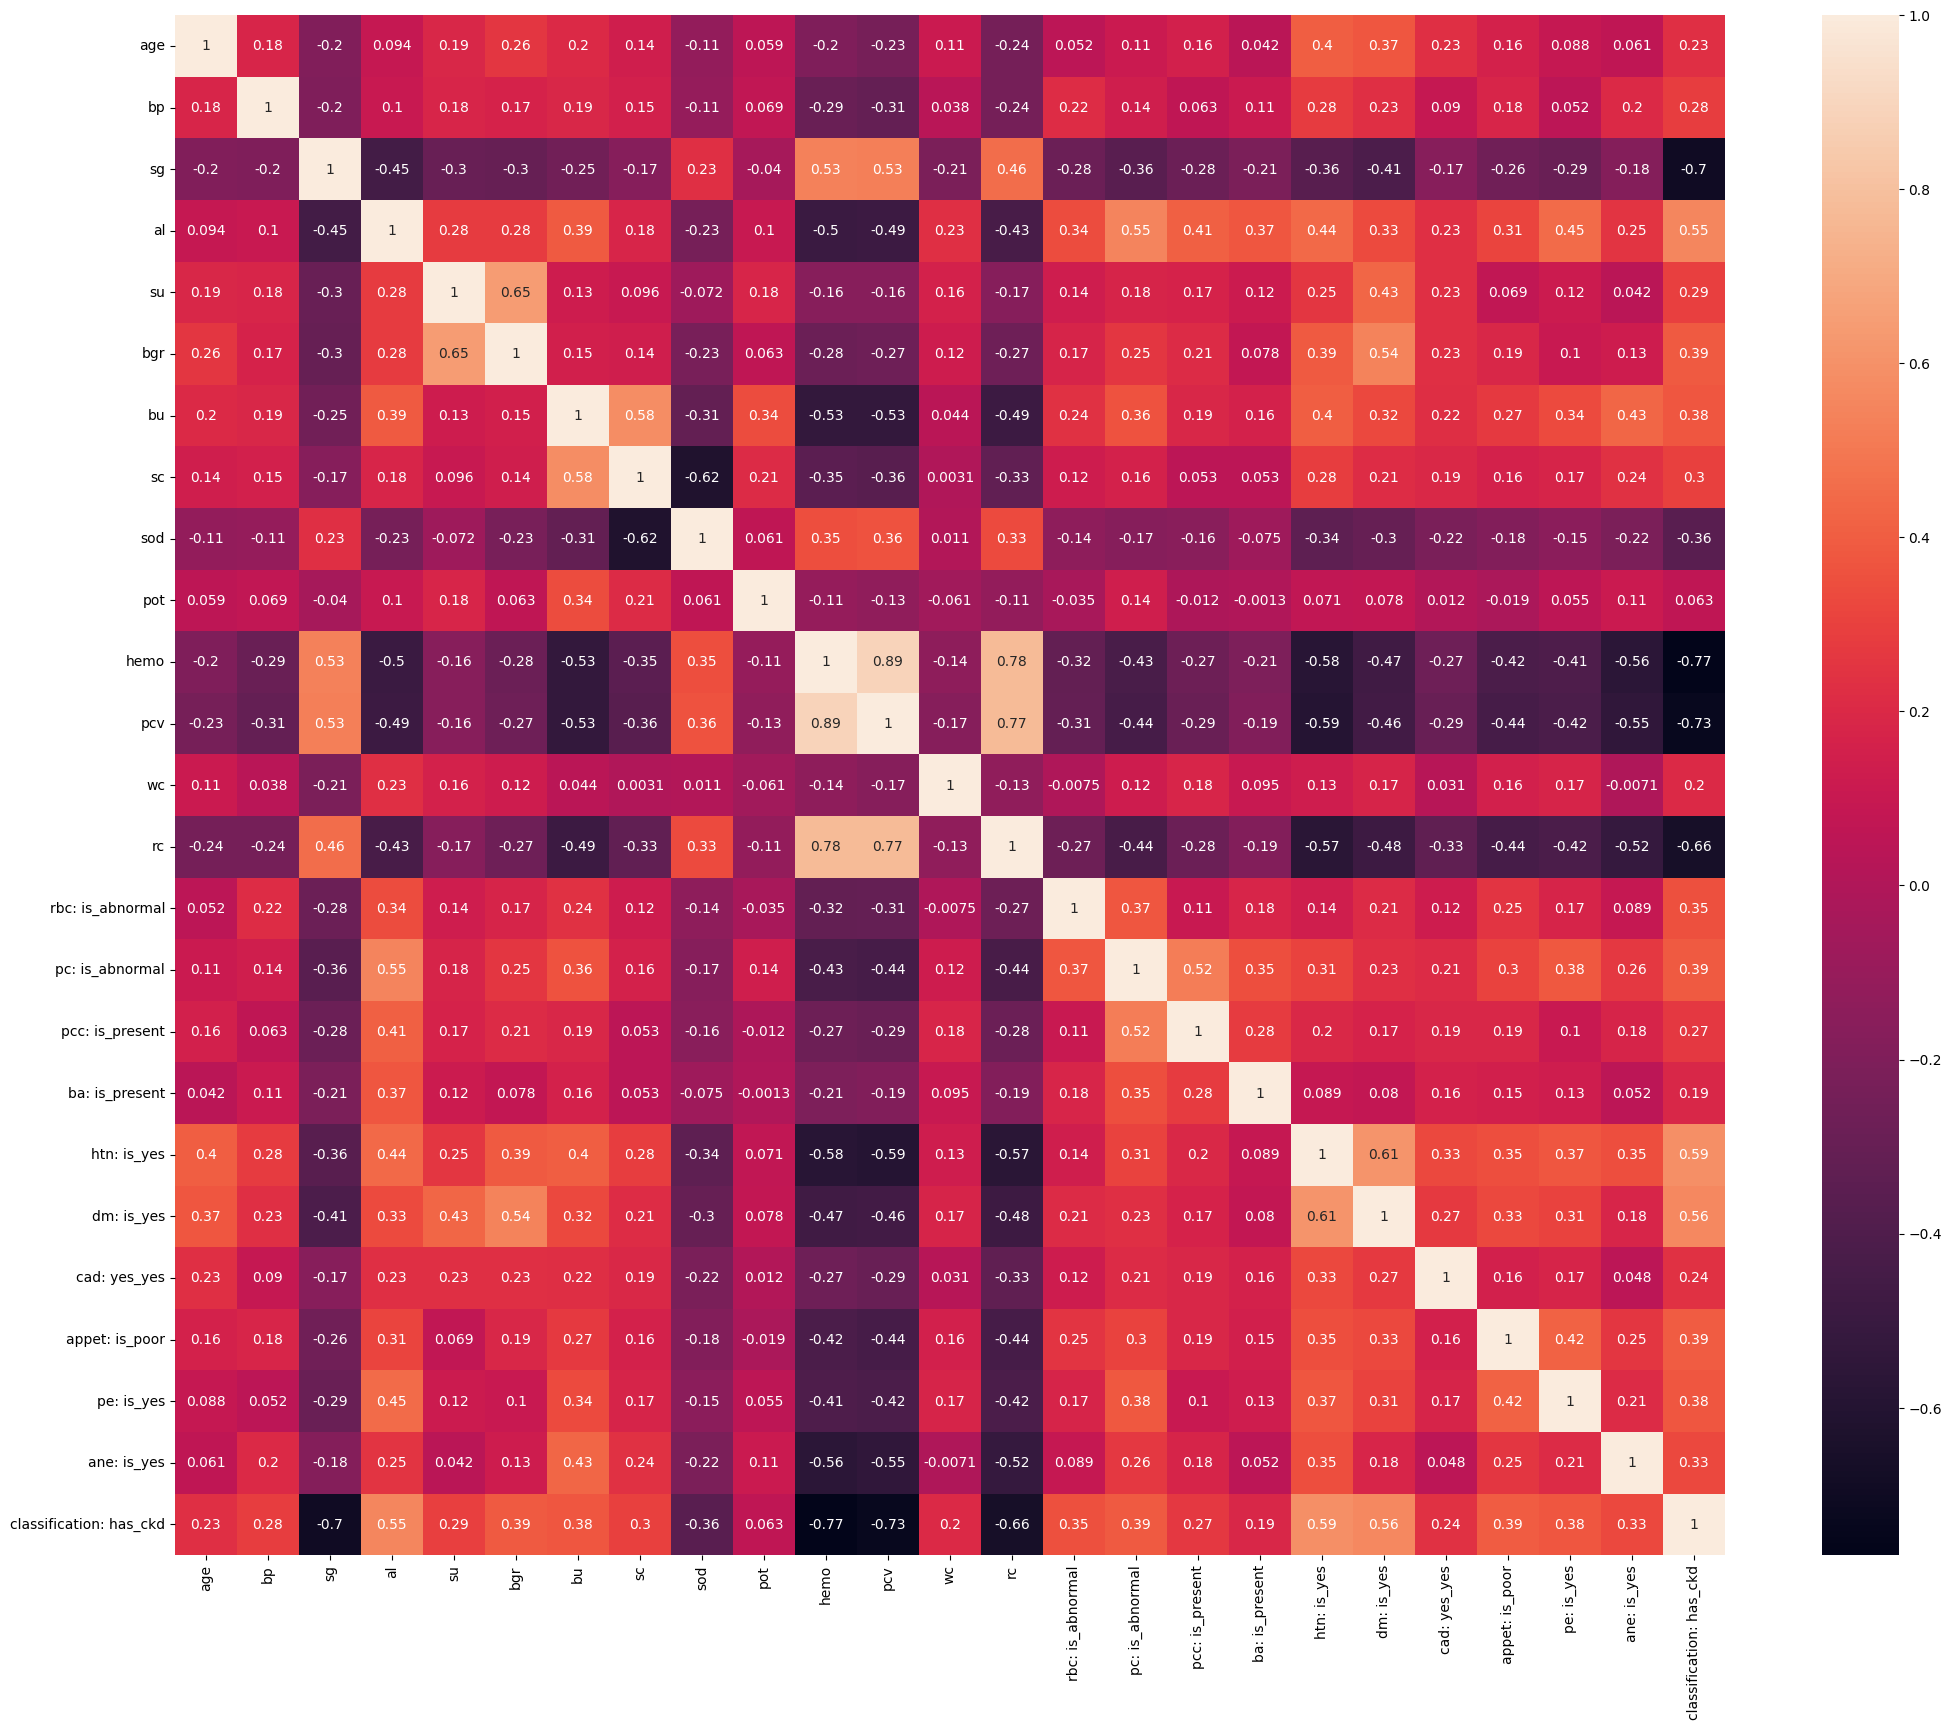

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
sns.heatmap(df2.corr(), annot=True)
plt.savefig("Heatmap.png")

In [37]:
target = df2['classification: has_ckd'].copy()
df2 = df2.drop('classification: has_ckd',axis = 1)
target

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification: has_ckd, Length: 400, dtype: uint8

In [38]:
len(df2.columns)

24

Train accuracy: 0.99
Test accuracy: 0.99

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

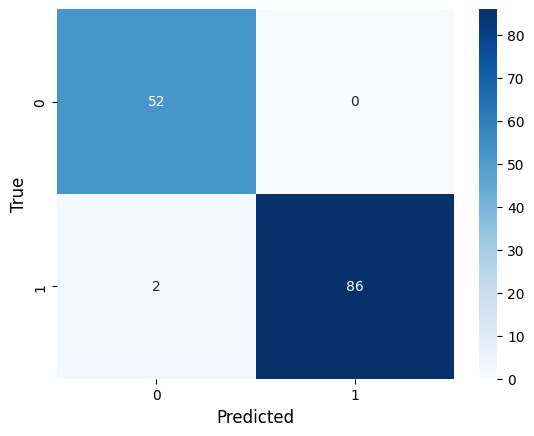

In [39]:
# Define Feature matrix ad Target vector
X = df2
y = pd.Series(target)

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, 
                                                    shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [40]:
'''one_hots = df2[['rbc: is_abnormal',	'pc: is_abnormal',	'pcc: is_present',	'ba: is_present',	'htn: is_yes',	'dm: is_yes',	'cad: yes_yes',	'appet: is_poor',	'pe: is_yes',	'ane: is_yes']].copy()
df2 = df2.drop(['rbc: is_abnormal',	'pc: is_abnormal',	'pcc: is_present',	'ba: is_present',	'htn: is_yes',	'dm: is_yes',	'cad: yes_yes',	'appet: is_poor',	'pe: is_yes',	'ane: is_yes'], axis = 1)'''

"one_hots = df2[['rbc: is_abnormal',\t'pc: is_abnormal',\t'pcc: is_present',\t'ba: is_present',\t'htn: is_yes',\t'dm: is_yes',\t'cad: yes_yes',\t'appet: is_poor',\t'pe: is_yes',\t'ane: is_yes']].copy()\ndf2 = df2.drop(['rbc: is_abnormal',\t'pc: is_abnormal',\t'pcc: is_present',\t'ba: is_present',\t'htn: is_yes',\t'dm: is_yes',\t'cad: yes_yes',\t'appet: is_poor',\t'pe: is_yes',\t'ane: is_yes'], axis = 1)"

In [41]:
X2 = df2.copy()

Eigenvalues:
[7.29477046 1.88887019 1.74567635 1.32004305 1.20398534 1.11179333
 1.01313362 0.96399371 0.91463777 0.78324946 0.75163472 0.69262665
 0.61779935 0.60152463 0.49536016 0.43600763 0.41747676 0.35611526
 0.34031192 0.28793639 0.26245934 0.23132243 0.22096714 0.10845472]

Variances (Percentage):
[30.31888973  7.85061673  7.25546731  5.48642894  5.00406409  4.62089104
  4.21083659  4.00659884  3.80146321  3.25538055  3.12398181  2.87872952
  2.56772855  2.50008676  2.05884065  1.81215672  1.73513779  1.48010403
  1.41442141  1.19673563  1.09084664  0.96143385  0.91839468  0.45076491]



Text(0, 0.5, 'Explained variance (%)')

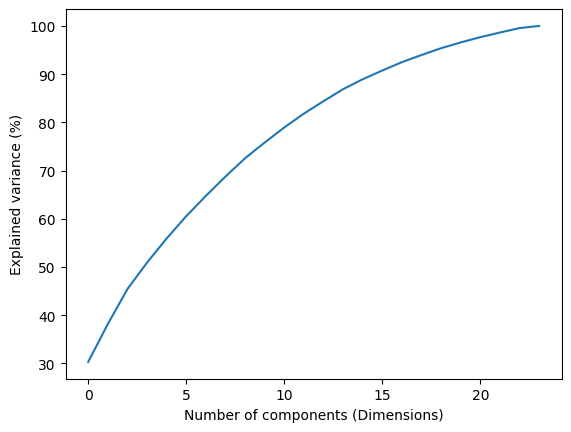

In [42]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X2)
# X_scaled = np.append(one_hots.to_numpy())

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [43]:

# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0 -0.981973 -0.485413  1.024645 -0.359525  0.144876 -0.108323  0.003935   
1 -1.573697  0.816205 -1.792386  0.584181  0.184815 -0.555292 -1.222072   
2  3.156721 -1.775070  1.771312 -0.695581 -1.400359  0.935338 -0.374260   
3  4.105989  1.258008 -2.557084 -0.321700  1.583219 -1.106218  0.472784   
4 -0.653222  0.160370 -0.519374 -0.319591 -0.142684  0.457176  0.163890   

         7         8         9         10        11        12        13  \
0 -0.202879  0.093559 -0.130591  0.142918  0.864903  0.729494 -0.789092   
1  0.955779 -2.057628  1.191655 -0.480300  0.289894  0.230207 -0.143064   
2  2.030347 -1.675447 -0.070324  1.337834  0.413299 -1.618145  1.635576   
3  1.569914 -1.535656 -1.803486  0.676066  0.909202  2.153785  0.535115   
4  0.518622  0.177975  0.721287 -1.270461  0.444182  0.752710  0.559634   

         14  
0  1.580286  
1  1.270831  
2 -1.195721  
3 -0.955176  
4 -0.435289  

Size: 
(400, 

<Axes: >

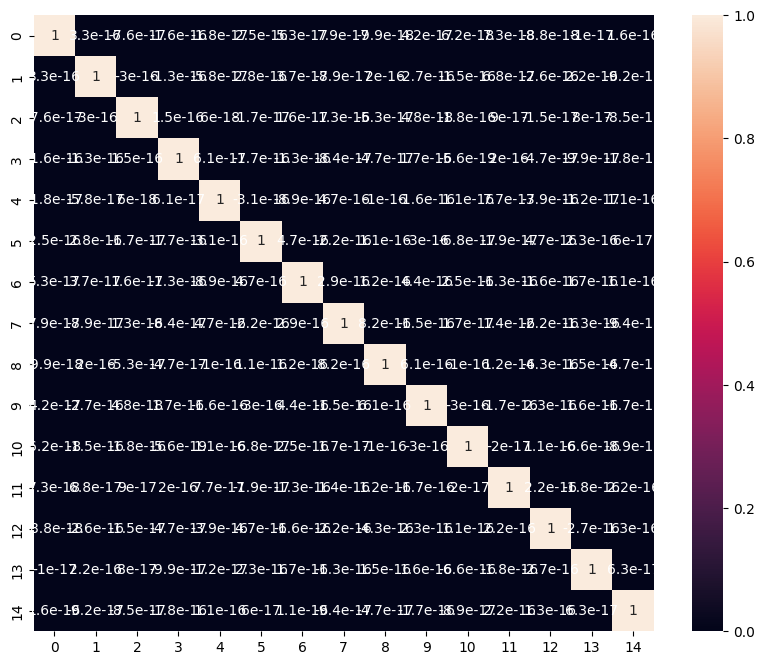

In [44]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

Train accuracy: 1.0
Test accuracy: 1.0

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

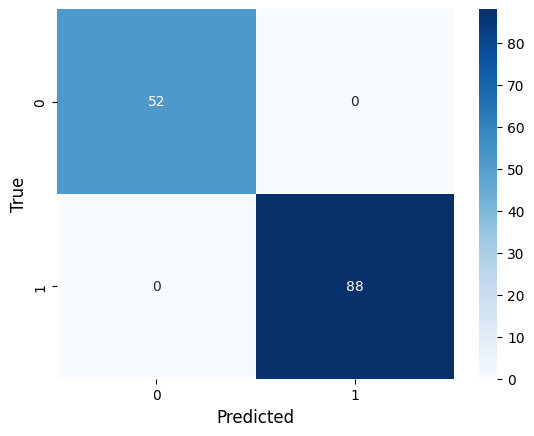

In [45]:

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.35, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca) # Predictions
y_true = y_test # True values

# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)